In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import librosa 

SR = 22050
os.chdir('/content/drive/MyDrive/my/music/files')

sfiles = [item for item in os.listdir(os.getcwd())]
sfiles.sort()
stimuli = [librosa.load(sfiles[i], sr=SR) for i in range(len(sfiles))]
print(sfiles)

['1.wav', '10.wav', '2.wav', '3.wav', '4.wav', '5.wav', '6.wav', '7.wav', '8.wav', '9.wav']


In [ ]:
import numpy as np
stim_wav = [stimuli[i][0] for i in range(len(stimuli))] #Get waveform

samp = SR*60*4 #used to trim all audio files to the first 4 mins
stims = [stim_wav[i][0:samp] for i in range(len(stim_wav))]

stims = np.array(stims) #easy to use matrix of all songs

print(stims.shape)

(10, 5292000)


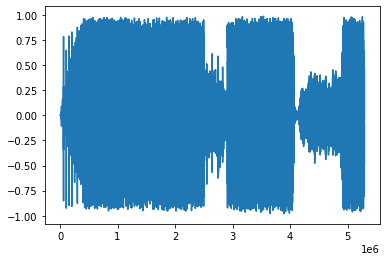

In [ ]:
import matplotlib.pyplot as plt

plt.plot(stims[0])

In [ ]:
#linear magnitude spectrogram 
y = stims[0]

linear = librosa.stft(y=y)
mag = np.abs(linear)
mag = 20 * np.log10(np.maximum(1e-5, mag))
print(mag.shape)

(1025, 10336)


[Text(0.5, 1.0, 'Lin Spectra')]

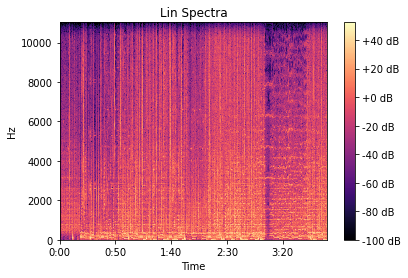

In [ ]:
import librosa.display 
#Time vs Frequency
fig, ax = plt.subplots()
img = librosa.display.specshow(mag,cmap='magma', x_axis='time', y_axis='linear', ax=ax, sr=SR, hop_length=512)
fig.colorbar(img, ax=ax,format="%+2.f dB")
ax.set(title='Lin Spectra')

In [ ]:
#Mel spectrogram 

mel = librosa.feature.melspectrogram(y)

mel = 20 * np.log10(np.maximum(1e-5, mel))

[Text(0.5, 1.0, 'Mel Spectra')]

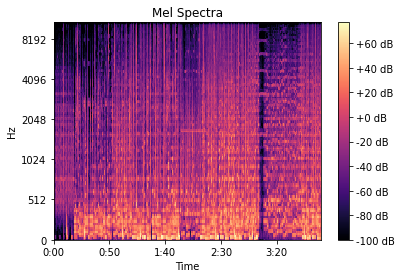

In [ ]:
#Time vs Frequency
fig, ax = plt.subplots()
img = librosa.display.specshow(mel,cmap='magma', x_axis='time', y_axis='mel', ax=ax, sr=SR, hop_length=512)
fig.colorbar(img, ax=ax,format="%+2.f dB")
ax.set(title='Mel Spectra')

In [ ]:
#Power Spectral Density
linear = librosa.stft(y=y)
mag = np.abs(linear)
mag = np.mean(mag**2,axis=1) #squared power mean
mag = 20 * np.log10(np.maximum(1e-5, mag))
print(mag.shape)

(1025,)


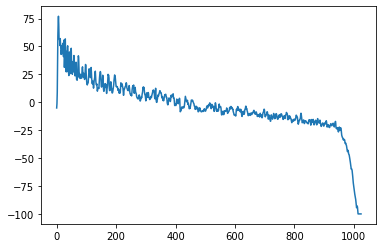

In [ ]:
#Periodogram
plt.plot(mag)